In [0]:
!pip install soundfile
import numpy as np
import  matplotlib.pyplot as plt
from scipy import signal
from matplotlib import mlab
import soundfile as sf
import cv2
from google.colab import drive
import pywt
drive.mount('/content/drive')
%cd drive/My\ Drive/Clicks\ removal

(251, 6042) 6.297916666666667


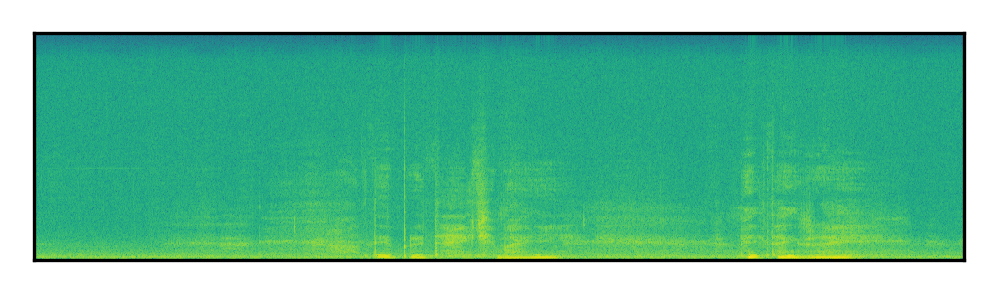

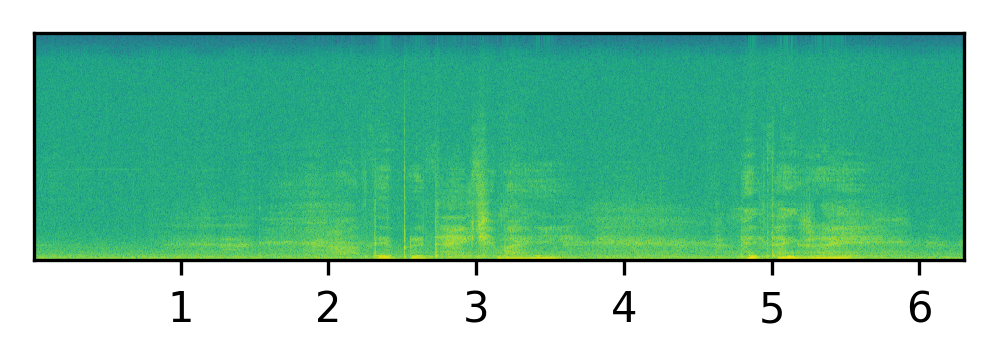

In [0]:
chunk = '03'
leng = 500 
overlap = 450
mod = 'magnitude'
wind = signal.kaiser(leng, beta=5)
# orig
sig_c, fs = sf.read('ORIGINAL_'+chunk+'.wav') 
plt.figure(dpi=300,figsize=(4,1))
spectrum_c, freqs, t, im = plt.specgram(sig_c, window=wind, NFFT=leng, noverlap=overlap, Fs=fs, mode=mod);
plt.xticks([])
plt.yticks([])
# proc
sig_p, fs = sf.read('PROCESSED_'+chunk+'.wav') 
plt.figure(dpi=300,figsize=(4,1))
spectrum_p, freqs, t, im = plt.specgram(sig_p, window=wind, NFFT=leng, noverlap=overlap, Fs=fs, mode=mod);
plt.yticks([]);
print(spectrum_c.shape,max(t))

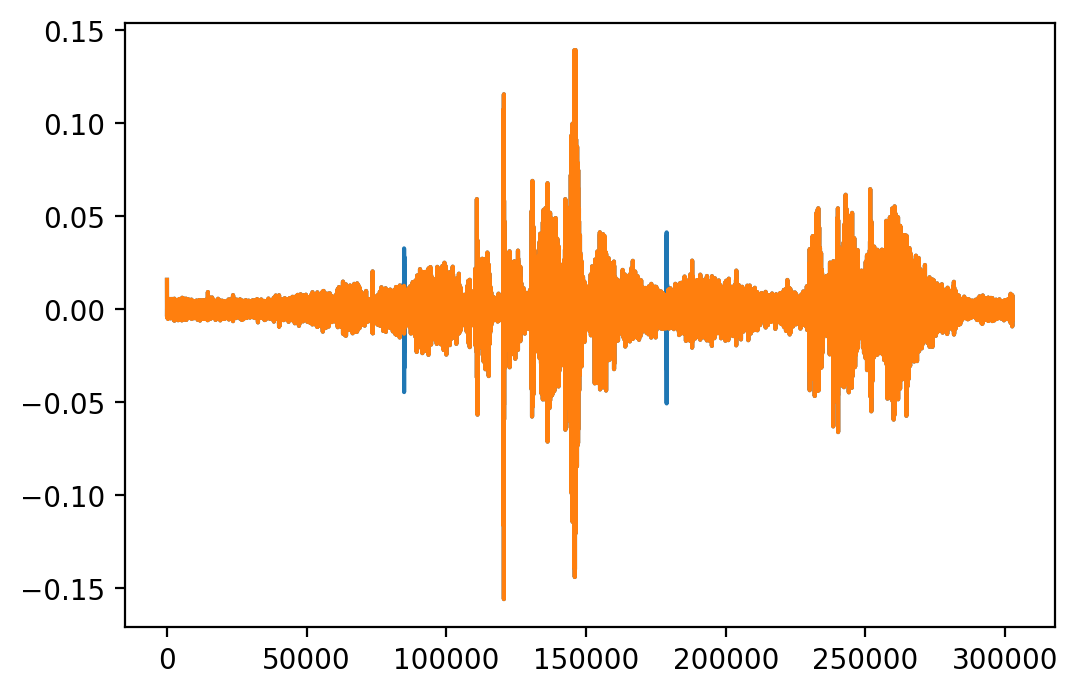

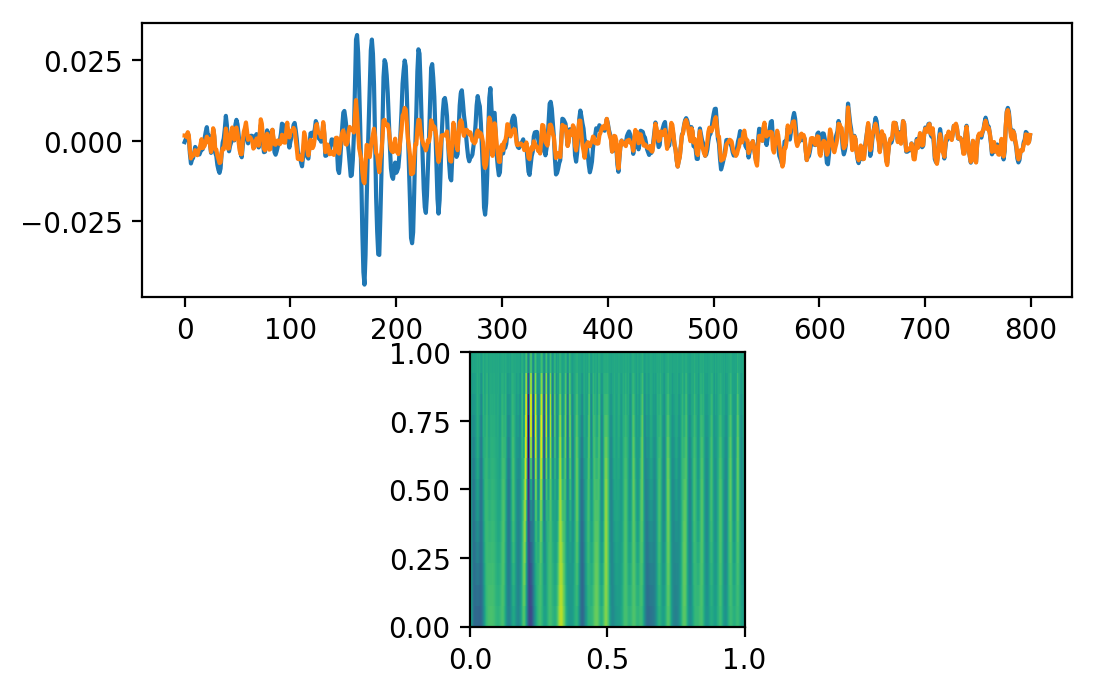

In [0]:
l=14
sl = slice(84700,85500)
wv = 'gaus1'
coefc, f = pywt.cwt(np.asarray(sig_c), np.arange(1,l), wv)
coefp, f = pywt.cwt(np.asarray(sig_p), np.arange(1,l), wv)
coefc = np.asarray(np.real(coefc))
coefp = np.asarray(np.real(coefp))

plt.figure(dpi=200)
plt.plot(coefc[0])
plt.plot(coefp[0])

f,a=plt.subplots(2,1,dpi=200)
a[0].plot(coefc[0][sl])
a[0].plot(coefp[0][sl])
a[1].imshow(coefc[:,sl],extent=[0, 1, 0, 1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


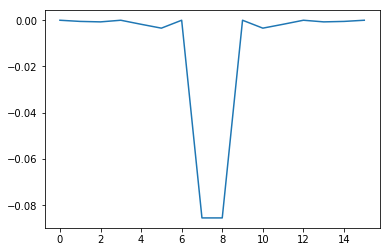

In [0]:
[phi, psi] = pywt.ContinuousWavelet('fbsp').wavefun(level=4)
plt.plot(phi)

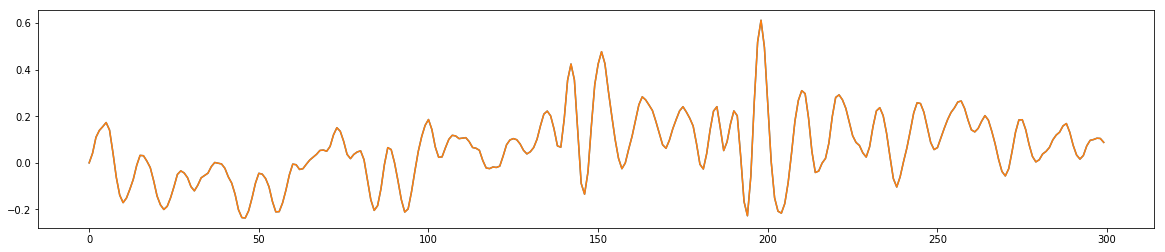

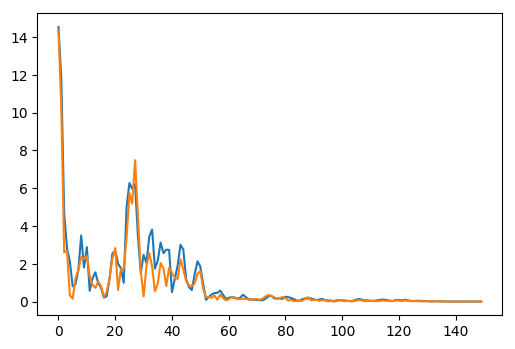

In [0]:
low = 184.5*1000
high = 184.8*1000
sh = 100
ran = slice(int(low),int(high))
sh_ran = slice(int(low+sh),int(high+sh))
plt.figure(figsize=(20,4))
plt.plot(sig_c[ran])
plt.plot(sig_p[ran])
#plt.figure(figsize=(20,4))
#plt.plot(sig_c[sh_ran])
#plt.plot(sig_p[ran]-sig_c[ran])


wind = signal.kaiser(high-low, beta=5)
Y_c=abs(np.fft.fft(wind*sig_c[ran]))
Y_p=abs(np.fft.fft(wind*sig_c[sh_ran]))
plt.figure(dpi=100)
plt.plot(Y_c[:len(Y_c)//2])
plt.plot(Y_p[:len(Y_c)//2])

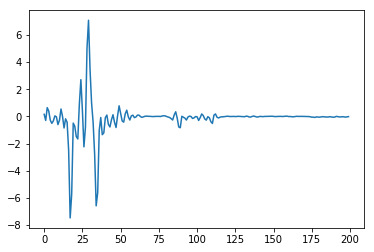

In [0]:
a = ss-Y_c
plt.plot(a[:200])

In [0]:
def kernel(cut):
  wid = 22
  pad = 20
  region = len(cut[:,1])//3
  resp = []
  for i in range(2*wid,len(cut[1,:])-2*wid):
    seg_left  = cut[region:,i-pad:i]
    seg_centr = cut[region:,i:i+wid]
    seg_right = cut[region:,i+wid:i+wid+pad]
    ker = np.sum(seg_centr) - 2*(np.sum(seg_left) + np.sum(seg_right))
    if ker<0:
      ker=0
    resp.append(ker)
  return resp

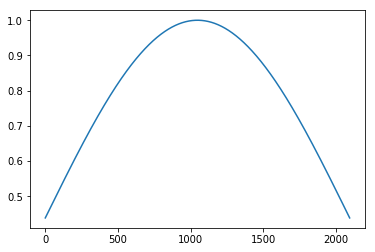

In [0]:
'''
cut_f = slice(0,500)
view_f = 205
view_t = slice(2000,3000)
cut_c = spectrum_c[cut_f,:]
cut_p = spectrum_p[cut_f,:]
resp_c = kernel(cut_c)
resp_p = kernel(cut_p)

plt.figure()
plt.plot(t[:len(resp_c)],resp_c, t[:len(resp_p)],resp_p)
plt.figure(figsize=(20,4)) 
tau = np.arange(view_t.start,view_t.stop)
plt.plot(tau, spectrum_c[view_f, view_t], tau, spectrum_p[view_f, view_t])
plt.minorticks_on()
plt.grid(b=True, axis='x', which='both')
plt.figure(dpi=200)
plt.imshow(spectrum_c[180:390, 2550:2650])
plt.colorbar()'''

wind = signal.kaiser(leng, beta=2)
plt.plot(wind)